<br><br>
<center><font size='5'><b>PyTorch Book</b></font><br><br><font size='5'>Chap3. 신경망 파헤치기<b></b></font>

# 신경망 구성 요소 

- 데이터 파이프라인 구축
- 신경망 아키텍처 구축
- cost function 이용해 아키텍처 평가
- 가중치 업데이트 및 최적화

## Layer - 신경망 기본 블록

In [1]:
import torch
from torch.nn import Linear, ReLU
import torch.nn as nn
import numpy as np
from torch.autograd import Variable

Linear 레이어 : $Y = xW + b$

In [25]:
x_train =  Variable(torch.randn(1,10))
myLayer = nn.Linear(10,5, bias=True) #또는 myLayer = Linear(in_features=10,out_features=5,bias=True)

print(x_train.shape)
print(myLayer(x_train))
print(myLayer(x_train).shape)

torch.Size([1, 10])
tensor([[ 0.5880,  0.1587,  0.6356, -0.6452,  0.9297]],
       grad_fn=<AddmmBackward>)
torch.Size([1, 5])


In [23]:
myLayer.weight # w의 transpose값

Parameter containing:
tensor([[ 0.1378, -0.2412, -0.0872,  0.0795, -0.0536,  0.1453, -0.2154,  0.0966,
         -0.1456, -0.0407],
        [ 0.0870, -0.2314,  0.0280,  0.1653,  0.0190,  0.1211, -0.0808,  0.0365,
         -0.0397, -0.3085],
        [ 0.2838,  0.1262,  0.0236,  0.0148, -0.1689,  0.2427,  0.1502,  0.3051,
         -0.1427,  0.1191],
        [ 0.0339,  0.2216, -0.2918, -0.1444,  0.2608,  0.0524,  0.2955,  0.2979,
         -0.2295,  0.3070],
        [ 0.2677, -0.0989,  0.1751, -0.1481,  0.3003, -0.3109,  0.0769,  0.1623,
          0.1779, -0.0333]], requires_grad=True)

In [24]:
myLayer.bias

Parameter containing:
tensor([ 0.0142,  0.1387, -0.2597, -0.0687, -0.0171], requires_grad=True)

## 선형 레이어 쌓기

- 각 레이어는 개별적으로 학습 파라미터를 갖는다.
- 그런데 선형 레이어를 쌓기만 하는 것은 도움이 안된다. 한개 쌓는것이랑 별반 차이가 없다.
  - $Y = 2(3X)$ = $Y = 6X$
  - 이러한 한계를 극복하기 위해 ```nonlinear activation function```이 사용 되는 것
      - sigmoid / Tanh / ReLU / Leaky ReLU 등.

In [26]:
Layer1 = nn.Linear(10,5)
Layer2 = nn.Linear(5,2)
Layer2(Layer1(x_train))

tensor([[0.7094, 0.0140]], grad_fn=<AddmmBackward>)

In [27]:
sample_data = Variable(torch.Tensor([[1,2,-1,-2]]))

myReLU = ReLU()
myReLU(sample_data)

tensor([[1., 2., 0., 0.]])

In [28]:
# 또는 function에서 relu있음
import torch.nn as nn
import torch.nn.functional as F

sample_data = Variable(torch.Tensor([[1,2,-1,-1]])) 
f = F.relu(sample_data) # Much simpler.
f

tensor([[1., 2., 0., 0.]])

## 비선형 활성 함수

- sigmoid : 시그모이드 출력값이 0이나 1에 가까워지면, 시그모이드 함수 앞 레이어 기울기는 0이 되므로, 가중치 조정이 잘 안됨
- Tanh : 시그모이드와 같은 문제가 발생하긴 하지만, 출력값이 0을 중심으로 만들어지기 때문에 시그모이드 보다 반환값 변화 폭이 더 큼. 기울기 소멸하는 증상이 덜 생김
- ReLU 
  - backprop 하면서 기울기가 큰 값을 ReLU에 전달하면 종종 응답이 없어지는 단점. 
  - learningrate 조정하면 방지할 수 있음
- Leaky ReLU : 음수가 입력될 경우 0이 아닌 0.001과 같은 아주 작은 수를 반환함.

## 신경망 구현

- PyTorch 네트워크는 모두 Class 형태로 개발된다. 
  - nn.Module 클래스를 상속하고,
  - init과 forward 메서드를 구현해야 함.(레이어들을 초기화 / 입력데이터 전달하고 출력을 반환)
  - nonlinear activation func.는 init, forward 둘다에서 사용될 수 있음.

In [30]:
class Network(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Network, self).__init__  #super는 자식 클래스의 인자를 부모클래스(nn.Module)에 전달하는 데 사용됨.
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.layer2 = nn.Linear(hidden_size, output_size)
    
    def __forward__(self, input):
        out = self.layer1(input)
        out = nn.ReLU(out)
        out = self.layer2(out)
        
        return out

## 오차 함수

- 회귀 문제는 대부분 MSE를 사용
- 분류 문제는 대부분 Cross-entropy loss를 사용
  - 예측한 확률이 실제 맞는 확률에서 벗어날때 교차엔트로피 오차가 증가한다.
  
- PyTorch에서 제공하는 오차 함수들 
  - L1 loss
  - MSE Loss
  - Cross-entropy loss
  - NLL loss
  - NLL loss2d

## 옵티마이저

- PyTorch에서 제공하는 옵티마이저
  - Adadelta
  - adagrad
  - Adam
  - SparseAdam
  - SGD
  - RMSProp 등등등

# 딥러닝 이용한 이미지 분류

https://www.kaggle.com/c/dogs-vs-cats

## Validation set 준비 

In [2]:
path = 'C:/Users/user/Desktop/Artificial Intelligence/STUDY/DLforALL_pytorch/dogs-vs-cats/train/'

In [3]:
from glob import glob
import os

# 폴더 안에 모든 파일 목록을 읽음
files = glob(os.path.join(path,'*/*.jpg'))

In [4]:
print('Total no of images {}'.format(len(files)))

Total no of images 25000


In [5]:
n_images = len(files)

In [6]:
import numpy as np

shuffle =np.random.permutation(n_images)

In [7]:
shuffle

array([ 7326, 16109, 11933, ..., 18917, 20576,  7282])

In [9]:
# make directory, valid 폴더 만들기
os.mkdir(os.path.join(path, 'valid'))

In [10]:
# train, valid 폴더 안에 각각 dog, cat 폴더 만들기
for t in ['train','valid']:
    for folder in ['dog/','cat/']:
        os.mkdir(os.path.join(path,t,folder))

In [18]:
files[100].split('/')[-1].split('.')[0].split('\\')[-1]

'cat'

In [22]:
files[100].split('/')[-1].split('\\')[-1]

'cat.10087.jpg'

In [23]:
for i in shuffle[:20000]:
    folder = files[i].split('/')[-1].split('.')[0].split('\\')[-1]
    image = files[i].split('/')[-1].split('\\')[-1]
    os.rename(files[i], os.path.join(path,'train',folder,image))

In [24]:
for i in shuffle[20000:]:
    folder = files[i].split('/')[-1].split('.')[0].split('\\')[-1]
    image = files[i].split('/')[-1].split('\\')[-1]
    os.rename(files[i], os.path.join(path,'valid',folder,image))

## GPU 가용 상태 확인

In [25]:
if torch.cuda.is_available():
    is_cuda=True

## PyTorch Tensor로 데이터 로딩

- transforms 모듈 : 이미지 크기 조정 / 파이토치 Tensor로 변환 / 데이터 normalization
- ImageFolder 클래스 : 변환 적용하고 이미지를 로딩한다.

In [27]:
from torchvision.datasets import ImageFolder
from torchvision import transforms


In [28]:
simple_transform = transforms.Compose([transforms.Scale((224,224)),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])
train = ImageFolder('C:/Users/user/Desktop/Artificial Intelligence/STUDY/DLforALL_pytorch/dogs-vs-cats/train/train/', simple_transform)
valid = ImageFolder('C:/Users/user/Desktop/Artificial Intelligence/STUDY/DLforALL_pytorch/dogs-vs-cats/train/valid/', simple_transform)

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\torchvision\transforms\transforms.py:208: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  warnings.warn("The use of the transforms.Scale transform is deprecated, " +


In [29]:
train.classes

['cat', 'dog']

In [30]:
train.class_to_idx

{'cat': 0, 'dog': 1}

In [39]:
# train[i] 하나하나 이미지는 이미지와 클래스인덱스를 튜플로 가지고 있다. 
train[50][0].size()

torch.Size([3, 224, 224])

### 플랏해보기

- Tensor 객체를 시각화하려면 Numpy 객체로 다시 변환한 후, 역정규화 해야한다.(밑에 함수로)

In [49]:
import matplotlib.pyplot as plt

def imshow(inp):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
#     plt.axis('off')

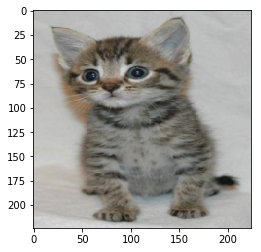

In [50]:
imshow(train[1000][0])

## 데이터 제너레이터 - 배치 처리 형태로 Tensor 로딩하기

- DataLoader 클래스

In [51]:
train_data_gen = torch.utils.data.DataLoader(train, shuffle=True, batch_size=64, num_workers=3)
valid_data_gen = torch.utils.data.DataLoader(valid,batch_size=64,num_workers=3)

# num_workers : 병렬 처리 담당. 컴퓨터에서 사용할 수 있는 코어 수보다 적게 설정

In [52]:
dataset_sizes = {'train':len(train_data_gen.dataset),'valid':len(valid_data_gen.dataset)}

In [53]:
dataloaders = {'train':train_data_gen,'valid':valid_data_gen}

## 네트워크 만들기

- 본 예제에서는 pre-trained 된 RESNET18 다운로드

In [54]:
from torchvision import models

model_ft = models.resnet18(pretrained=True) # 사전 학습된 가중치로 initialization

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to C:\Users\user/.cache\torch\checkpoints\resnet18-5c106cde.pth
94.0%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [55]:
model_ft

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Co

In [56]:
# 맨 마지막 fc의 out_features를 클래스가 2인걸로 바꿔야함. 
num_ftrs = model_ft.fc.in_features #512
model_ft.fc = nn.Linear(num_ftrs, 2)

In [57]:
if torch.cuda.is_available():
    model_ft = model_ft.cuda()

## 모델 학습

In [59]:
# cost function 과 optimizer

from torch import optim
from torch.optim import lr_scheduler

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1) #StepLR 함수는 학습률을 동적으로 변경하는 기능

- 모델에 이미지를 전달하고 오차를 계산
- 학습 단계에서 역전파를 수행, 유효성 검사/테스트 단계에서는 가중치를 업데이트하지 않음
- 에폭 동안 각 배치에서 발생하는 오차를 누적
- 최상의 모델이 저장되고 정확도를 프린트

In [60]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=5):
    since = time.time()

    best_model_wts = model.state_dict()
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # 각 Epoch은 학습 단계와 검증 단계를 거침
        for phase in ['train', 'valid']:
            if phase == 'train':
                scheduler.step()
                model.train(True)  # 학습 모드 설정
            else:
                model.train(False)  # 검증 모드 설정

            running_loss = 0.0
            running_corrects = 0

            # 데이터 반
            for data in dataloaders[phase]:
                # 입력 데이터 가져오기
                inputs, labels = data

                # 데이터를 Vaariable로 만듦
                if torch.cuda.is_available():
                    inputs = Variable(inputs.cuda())
                    labels = Variable(labels.cuda())
                else:
                    inputs, labels = Variable(inputs), Variable(labels)

                # 파라미터 기울기 초기화
                optimizer.zero_grad()
                
                # forward
                outputs = model(inputs)
                _, preds = torch.max(outputs.data, 1)
                loss = criterion(outputs, labels)

                # 학습 단계에서만 수행, 역전파 + 옵티마이즈(최적화)
                if phase == 'train':
                    loss.backward()
                    optimizer.step()

                # 통계
                running_loss += loss.data
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss.item() / dataset_sizes[phase]
            epoch_acc = running_corrects.item() / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            # 모델 복사(Deep Copy)
            if phase == 'valid' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = model.state_dict()

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # 최적의 모델 가중치 로딩
    model.load_state_dict(best_model_wts)
    return model

In [65]:
import time

# %%time
model_ft = train_model(model_ft, criterion, optimizer, exp_lr_scheduler, num_epochs=5)

Epoch 0/4
----------


KeyboardInterrupt: 